In [20]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../utils/")
import gcn_tools as gc
from gcn_tools import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
df_final= pd.read_csv("../data_sample/DF_ALL_FEATURES.csv")

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ubicacion                    2823 non-null   object 
 1   codigo_ine                   2823 non-null   int64  
 2   Comunidad Autónoma           2823 non-null   object 
 3   Provincia                    2823 non-null   object 
 4   %_casas_vacias               2823 non-null   float64
 5   Viviendas totales            2823 non-null   int64  
 6   Mediana consumo anual        2823 non-null   int64  
 7   Viviendas con bajo consumo   2823 non-null   int64  
 8   Viviendas de uso esporádico  2823 non-null   int64  
 9   prev_res_misma_vivienda      2823 non-null   int64  
 10  prev_res_mismo_municipio     2823 non-null   int64  
 11  prev_res_misma_provincia     2823 non-null   int64  
 12  prev_res_misma_comunidad     2823 non-null   int64  
 13  prev_res_dif_comun

In [23]:
# CONVERTIR LAS CATEGORICAS A ONE-HOT ANTES DE DIVIDIR EN TRAIN Y TEST PARA EVITAR INCONSISTENCIAS.

In [24]:
df_final= pd.get_dummies(df_final,columns=['Comunidad Autónoma', 'Provincia'],dtype=int)
target='%_casas_vacias'

In [25]:
#DIVISION TRAIN Y TEST

In [26]:
X = df_final.drop(columns=['%_casas_vacias', 'ubicacion', 'codigo_ine']) #ELIMINO TARGET Y VARIABLES INDICE
y = df_final['%_casas_vacias']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (2258, 111)
Tamaño de X_test: (565, 111)
Tamaño de y_train: (2258,)
Tamaño de y_test: (565,)


Text(0.5, 1.0, 'Distribución de la Variable Objetivo en el Conjunto de Entrenamiento')

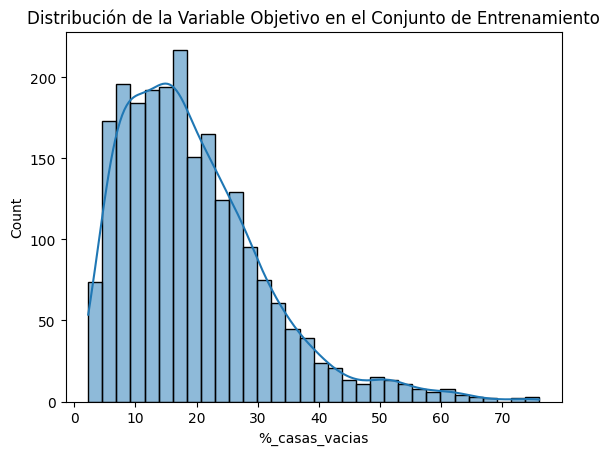

In [13]:
sns.histplot(y_train, kde=True)
plt.title("Distribución de la Variable Objetivo en el Conjunto de Entrenamiento")

In [ ]:
# ANALIZAR POSIBLE COLINEALIDAD

In [38]:
posible_colinealidad_dict = {
    "Viviendas y Movilidad": ['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 
                               'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 'prev_res_mismo_municipio', 
                               'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 
                               'prev_res_en_extranjero', 'prev_res_no_nacido'],
    
    "Demografia": ['Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 
                   'Hombres', 'Hombres_-16', 'Hombres_16-64', 'Hombres_+65', 
                   'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65'],
    
    "Empleo y Paro": ['total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 
                      'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 
                      'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 
                      'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior'],
    
    "Geografia": ['SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD']
}

target='%_casas_vacias'

In [17]:
train_set = pd.concat([X_train, y_train], axis=1)

In [32]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2258 entries, 927 to 860
Columns: 112 entries, Viviendas totales to %_casas_vacias
dtypes: float64(5), int32(71), int64(36)
memory usage: 1.3 MB


In [36]:
correlaciones=train_set.iloc[:,:40].corrwith(y_train)
correlaciones=correlaciones.abs().sort_values(ascending=False)
correlaciones

LONGITUD_ETRS89                0.372081
ALTITUD                        0.204055
PERIMETRO                      0.201214
prev_res_misma_provincia       0.197341
Paro Industria                 0.189800
SUPERFICIE                     0.163653
Paro hombre edad < 25          0.151078
Paro Agricultura               0.146762
Paro mujer edad < 25           0.143387
Paro mujer edad >=45           0.136377
Paro Sin empleo Anterior       0.135365
prev_res_misma_vivienda        0.134821
Hombres_-16                    0.133664
Paro Construcción              0.133380
Poblacion_-16                  0.133269
Mujeres_-16                    0.132853
total Paro Registrado          0.132024
Paro mujer edad 25 -45         0.131754
prev_res_no_nacido             0.128634
Paro hombre edad >=45          0.125316
Paro Servicios                 0.123933
Viviendas de uso esporádico    0.123275
Paro hombre edad 25 -45        0.122417
prev_res_misma_comunidad       0.120616
Hombres                        0.119366


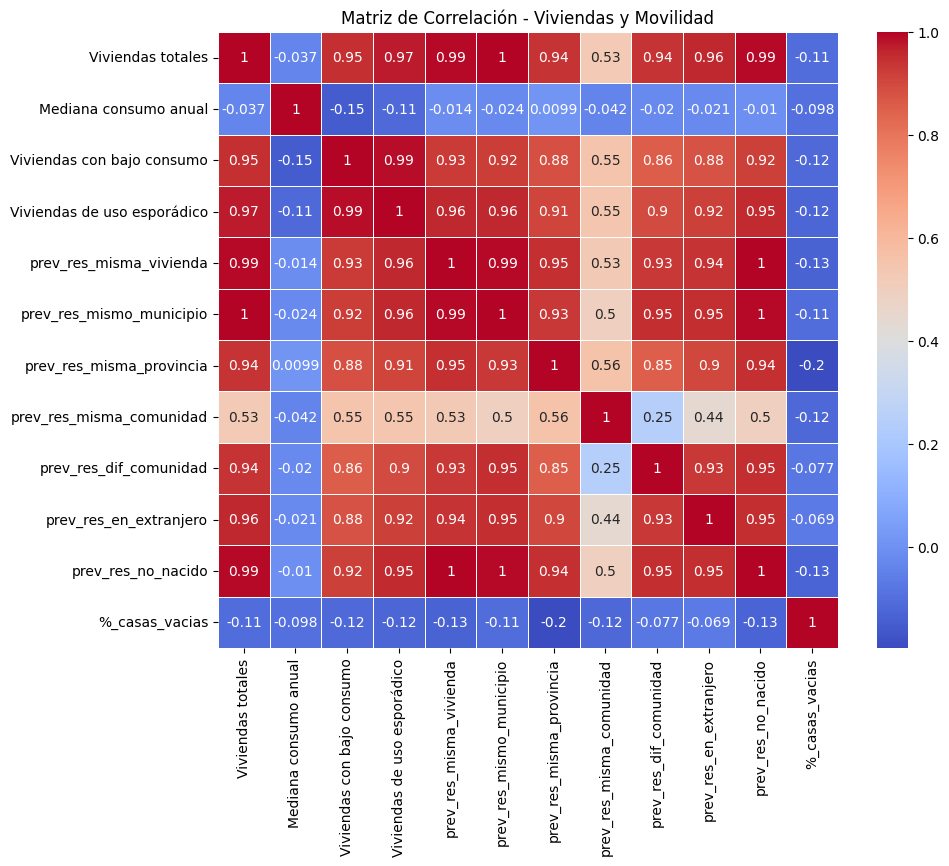

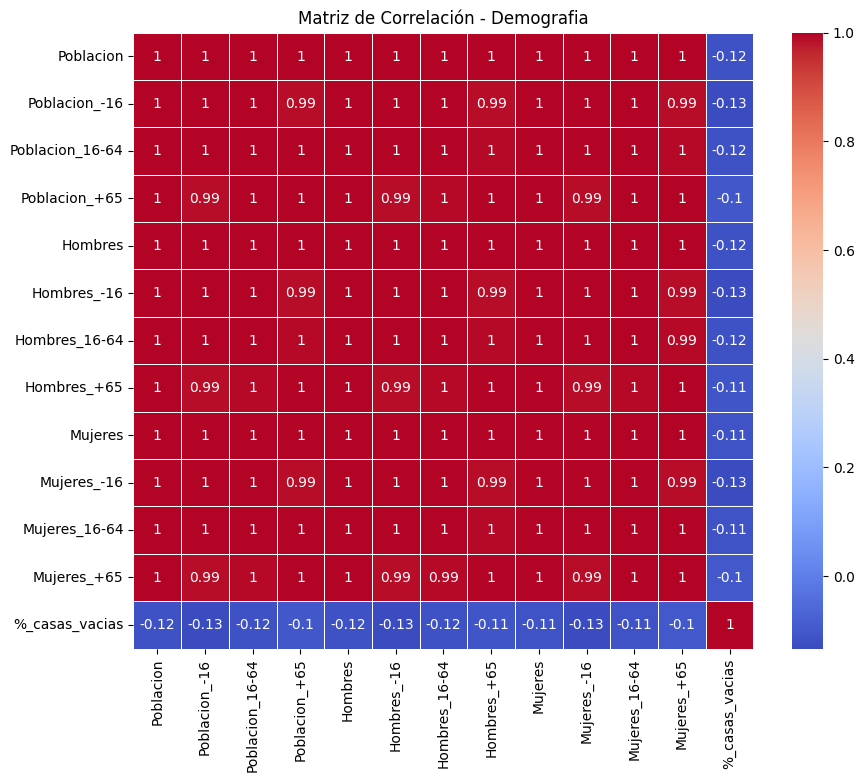

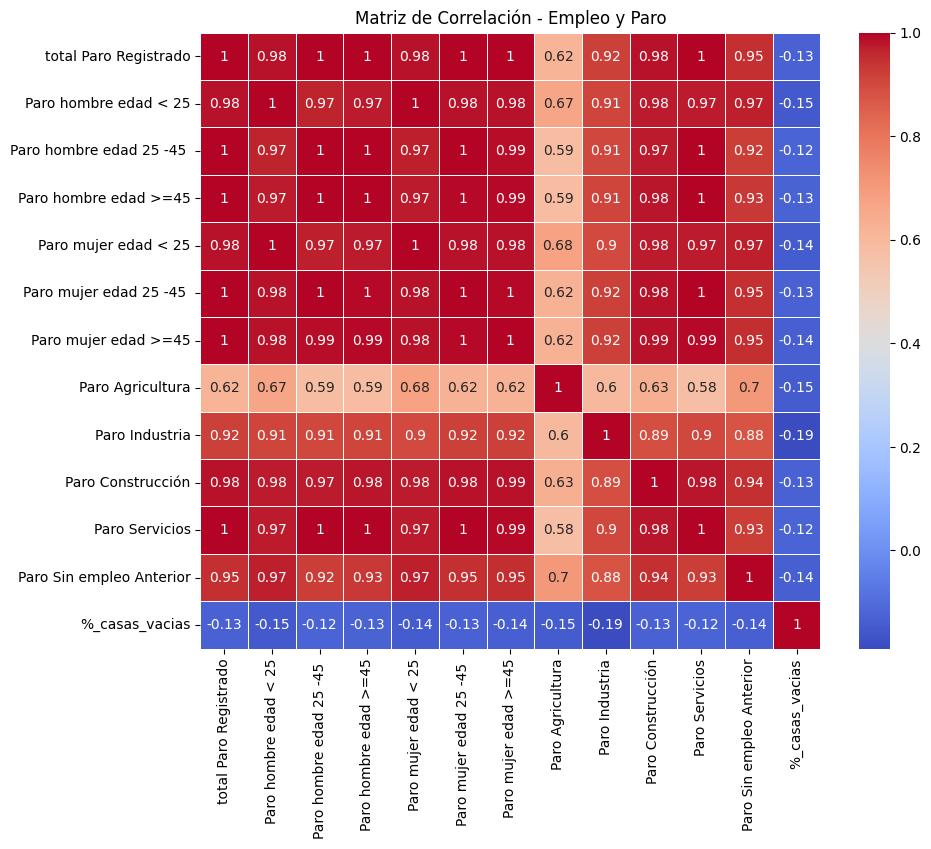

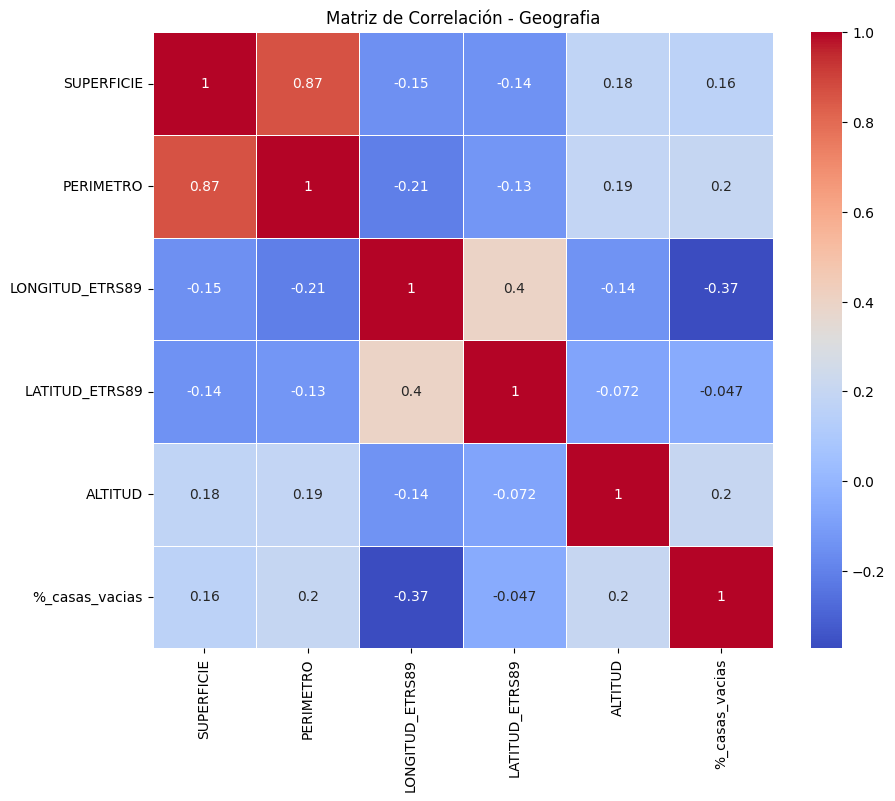

In [ ]:
# HEATMAPS DE COLINEALIDAD ENTRE VARIABLES Y CORRELACIÓN CON EL TARGET POR GRUPO DE FEATURES

for nombre_grupo, lista_feats in posible_colinealidad_dict.items():
    columnas_a_usar = lista_feats + [target]
    df_subset = train_set[columnas_a_usar]

    corr_matrix = df_subset.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f"Matriz de Correlación - {nombre_grupo}")
    plt.show()

In [ ]:
# ENTRE VARIABLES EXCESIVAMENTE COLINEADAS ME QUEDO CON LA QUE MAS CORRELACIÓN TENGA CON EL TARGET

umbral_colinealidad = 0.95
seleccion_anticolinealidad = []

for nombre_grupo, lista_feats in posible_colinealidad_dict.items():
    print(f"\nEvaluando grupo: {nombre_grupo}")

    df_subset = train_set[lista_feats + [target]]
    corr_matrix = df_subset.corr().abs()
    variables_a_eliminar = []

    for var1 in lista_feats:
        for var2 in lista_feats:
            if var1 != var2 and corr_matrix.loc[var1, var2] > umbral_colinealidad:
                if abs(corr_matrix.loc[var1, target]) >= abs(corr_matrix.loc[var2, target]):
                    if var2 not in variables_a_eliminar:  
                        variables_a_eliminar.append(var2)
                else:
                    if var1 not in variables_a_eliminar:
                        variables_a_eliminar.append(var1)

    variables_finales = [var for var in lista_feats if var not in variables_a_eliminar]
    print(f"Variables eliminadas: {variables_a_eliminar}")
    print(f"Variables conservadas: {variables_finales}")
    seleccion_anticolinealidad.extend(variables_finales)

print("\nTotal variables seleccionadas:")
print(seleccion_anticolinealidad)


Evaluando grupo: Viviendas y Movilidad
Variables eliminadas: ['Viviendas totales', 'prev_res_mismo_municipio', 'prev_res_en_extranjero', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_no_nacido']
Variables conservadas: ['Mediana consumo anual', 'prev_res_misma_vivienda', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad']

Evaluando grupo: Demografia
Variables eliminadas: ['Poblacion', 'Poblacion_+65', 'Hombres_+65', 'Mujeres', 'Mujeres_16-64', 'Mujeres_+65', 'Poblacion_16-64', 'Hombres', 'Poblacion_-16', 'Hombres_16-64', 'Mujeres_-16']
Variables conservadas: ['Hombres_-16']

Evaluando grupo: Empleo y Paro
Variables eliminadas: ['total Paro Registrado', 'Paro hombre edad 25 -45 ', 'Paro hombre edad >=45', 'Paro mujer edad 25 -45 ', 'Paro Servicios', 'Paro mujer edad < 25', 'Paro mujer edad >=45', 'Paro Construcción', 'Paro Sin empleo Anterior']
Variables conservadas: ['Paro hombre edad < 25', 'Paro Agricultura', 'Paro Industria']



In [ ]:



# ------------------------------------ LO DEJÉ POR AQUI AHORA TOCA IR A BUSCAR A LA COMPETI DE KAGGLE LAS DIFERENTES FORMAS DE SELECCIONAR FEATURES 
# ------------------------------------ Y METER MÁS SELECCIONES EN EL DICCIONARIO




In [49]:
all_feats=X_train.columns.to_list()
print(len(all_feats))

111


In [51]:
num_feats= ['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 
                  'prev_res_mismo_municipio', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'prev_res_en_extranjero',
                  'prev_res_no_nacido', 'Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 'Hombres', 'Hombres_-16', 'Hombres_16-64', 
                  'Hombres_+65', 'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65', 'total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 
                  'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 
                  'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD']
len(num_feats)

40

In [52]:
cat_feats=X_train.columns[40:]
len(cat_feats)

71

In [55]:
len(seleccion_anticolinealidad)

14

In [56]:
seleccion_anticol_y_catfeats= seleccion_anticolinealidad.copy()
seleccion_anticol_y_catfeats.extend(cat_feats)
len(seleccion_anticol_y_catfeats)

85

In [57]:
selecciones_features_dic={
    "all_feats": all_feats,
    
    "num_feats": num_feats,
                  
    "seleccion_anticolinealidad": seleccion_anticolinealidad,

    "seleccion_anticol_y_catfeats": seleccion_anticol_y_catfeats,
}

In [58]:
#Primero con el selectfrommodel entrenando un modelo de randomforest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

rf_selector = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_selector.fit(X_train, y_train)

selector = SelectFromModel(rf_selector, threshold="median")
selector.fit(X_train, y_train)
seleccion_modelo = X_train.columns[selector.get_support()].tolist()

print(len(seleccion_modelo))
print(seleccion_modelo)

56
['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 'prev_res_mismo_municipio', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'prev_res_en_extranjero', 'prev_res_no_nacido', 'Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 'Hombres', 'Hombres_-16', 'Hombres_16-64', 'Hombres_+65', 'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65', 'total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD', 'Comunidad Autónoma_Asturias, Principado de', 'Comunidad Autónoma_Balears, Illes', 'Comunidad Autónoma_Castilla - La Mancha', 'Comunidad Autónoma_Galicia', 'Comunid

In [59]:
selecciones_features_dic["seleccion_modelo"]= seleccion_modelo

In [61]:
#Ahora con RFE y voy a probar varias cantidades quiero una seleccion de 20 otra de 35, de 50, de 65 y de 80
from sklearn.feature_selection import RFE

rf_rfe = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
num_features_list = [20, 35, 50, 65, 80] 
selecciones_rfe_list = []

for num_features in num_features_list:
    rfe_selector = RFE(estimator=rf_rfe, n_features_to_select=num_features)
    rfe_selector.fit(X_train, y_train)
    seleccion_actual = X_train.columns[rfe_selector.ranking_ == 1].tolist()
    selecciones_rfe_list.append(seleccion_actual)

selecciones_features_dic["seleccion_rfe_20"] = selecciones_rfe_list[0]
selecciones_features_dic["seleccion_rfe_35"] = selecciones_rfe_list[1]
selecciones_features_dic["seleccion_rfe_50"] = selecciones_rfe_list[2]
selecciones_features_dic["seleccion_rfe_65"] = selecciones_rfe_list[3]
selecciones_features_dic["seleccion_rfe_80"] = selecciones_rfe_list[4]

In [62]:
print("Diccionario de selecciones de features:")
for key, value in selecciones_features_dic.items():
    print(f"{key}: {(value)}")

Diccionario de selecciones de features:
all_feats: ['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 'prev_res_mismo_municipio', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'prev_res_en_extranjero', 'prev_res_no_nacido', 'Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 'Hombres', 'Hombres_-16', 'Hombres_16-64', 'Hombres_+65', 'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65', 'total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD', 'Comunidad Autónoma_Andalucía', 'Comunidad Autónoma_Aragón', 'Comunidad Autónoma_Asturias, Principado de', 'Comunida

In [63]:
# VOY A UTILIZAR RFECV QUE SELECCIONA DE POR SI EL NUMERO OPTIMO DE FEATURES Y LUEGO HARÉ 3 SFS QUE SELECCIONEN FEATURES ALREDEDOR DE ESE NUMERO OPTIMO.

from sklearn.feature_selection import RFECV

rf_RFECV = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfecv = RFECV(estimator=rf_RFECV, step=1, cv=5, n_jobs=-1)
rfecv.fit(X_train, y_train)

num_opt = rfecv.n_features_
features_rfecv = X_train.columns[rfecv.support_].tolist()

selecciones_features_dic["seleccion_rfecv"] = features_rfecv

In [64]:
from sklearn.feature_selection import SequentialFeatureSelector

rf_sfs = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
num_features_list = [num_opt - 3, num_opt, num_opt + 3]

for num_features in num_features_list:
    sfs_selector = SequentialFeatureSelector(rf_sfs, n_features_to_select=num_features, cv=5, n_jobs=-1)
    sfs_selector.fit(X_train, y_train)
    print(len(sfs_selector.get_feature_names_out()))
    seleccion_actual = list(sfs_selector.get_feature_names_out())
    key_name = f"seleccion_sfs_{num_features}"
    selecciones_features_dic[key_name] = seleccion_actual

9
12
15


In [65]:
print("Diccionario de selecciones de features:")
for key, value in selecciones_features_dic.items():
    print(f"{key}: {(value)}")

Diccionario de selecciones de features:
all_feats: ['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 'prev_res_mismo_municipio', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'prev_res_en_extranjero', 'prev_res_no_nacido', 'Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 'Hombres', 'Hombres_-16', 'Hombres_16-64', 'Hombres_+65', 'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65', 'total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD', 'Comunidad Autónoma_Andalucía', 'Comunidad Autónoma_Aragón', 'Comunidad Autónoma_Asturias, Principado de', 'Comunida

In [66]:
#GUARDO EL DICCIONARIO CON JSON PARA NO TENER QUE REPETIR MÁS ESTA EJECUCIÓN.
import json

with open("../data_sample/selecciones_features_dic.json", "w") as feat_dic:
    json.dump(selecciones_features_dic, feat_dic)

In [ ]:
# PRUEBA CON TODAS LAS FEATURES NUMERICAS Y CON LA SELECCIÓN

In [ ]:
# BASE PARA COMPROBACIONES CAMBIAR "__" POR NOMBRE SELECCION Y "PON AQUI LA SELECCION" POR LAS COLUMNAS SELECCIONADAS (SE PODRÍA HACER CON UNA FUNCIÓN)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf__ = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf__.fit(X_train[PON AQUI LA SELECCION], y_train)
y_pred__ = rf__.predict(X_test[PON AQUI LA SELECCION])

mae__ = mean_absolute_error(y_test, y_pred__)
mse__ = mean_squared_error(y_test, y_pred__)
rmse__= np.sqrt(mse__)
r2__ = r2_score(y_test, y_pred__)

print(f"Random Forest - MAE: {mae__:.2f}")
print(f"Random Forest - RMSE: {rmse__:.2f}")
print(f"Random Forest - R²: {r2__:.4f}")

In [63]:
# PRUEBA CON TODAS LAS NUMERICAS, SIN CATEGORICAS
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_allnum_nocat = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_allnum_nocat.fit(X_train[num_feats], y_train)
y_pred_allnum_nocat = rf_allnum_nocat.predict(X_test[num_feats])

mae_allnum_nocat = mean_absolute_error(y_test, y_pred_allnum_nocat)
mse_allnum_nocat = mean_squared_error(y_test, y_pred_allnum_nocat)
rmse_allnum_nocat= np.sqrt(mse_allnum_nocat)
r2_allnum_nocat = r2_score(y_test, y_pred_allnum_nocat)

print(f"Random Forest - MAE: {mae_allnum_nocat:.2f}")
print(f"Random Forest - RMSE: {rmse_allnum_nocat:.2f}")
print(f"Random Forest - R²: {r2_allnum_nocat:.4f}")

Random Forest - MAE: 4.63
Random Forest - RMSE: 6.25
Random Forest - R²: 0.7600


In [ ]:
# PRUEBA CON LA SELECCIÓN EVITANDO COLINEALIDAD Y SIN CATEGORICAS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

rf_nocoli_nocat = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_nocoli_nocat.fit(X_train[seleccion_anticolinealidad], y_train)
y_nocoli_nocat= rf_nocoli_nocat.predict(X_test[seleccion_anticolinealidad])

mae_nocoli_nocat = mean_absolute_error(y_test, y_nocoli_nocat)
mse_nocoli_nocat = mean_squared_error(y_test, y_nocoli_nocat)
rmse_nocoli_nocat = np.sqrt(mse_nocoli_nocat)
r2_nocoli_nocat = r2_score(y_test, y_nocoli_nocat)

print(f"Random Forest - MAE: {mae_nocoli_nocat:.2f}")
print(f"Random Forest - RMSE: {rmse_nocoli_nocat:.2f}")
print(f"Random Forest - R²: {r2_nocoli_nocat:.4f}")

Random Forest - MAE: 4.69
Random Forest - RMSE: 6.41
Random Forest - R²: 0.7473


In [ ]:
# BASE PARA COMPROBACIONES CAMBIAR "_allnum_allcat" POR NOMBRE SELECCION Y "PON AQUI LA SELECCION" POR LAS COLUMNAS SELECCIONADAS (SE PODRÍA HACER CON UNA FUNCIÓN)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_allnum_allcat = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_allnum_allcat.fit(X_train, y_train)
y_pred_allnum_allcat = rf_allnum_allcat.predict(X_test)

mae_allnum_allcat = mean_absolute_error(y_test, y_pred_allnum_allcat)
mse_allnum_allcat = mean_squared_error(y_test, y_pred_allnum_allcat)
rmse_allnum_allcat= np.sqrt(mse_allnum_allcat)
r2_allnum_allcat = r2_score(y_test, y_pred_allnum_allcat)

print(f"Random Forest - MAE: {mae_allnum_allcat:.2f}")
print(f"Random Forest - RMSE: {rmse_allnum_allcat:.2f}")
print(f"Random Forest - R²: {r2_allnum_allcat:.4f}")

Random Forest - MAE: 4.54
Random Forest - RMSE: 6.14
Random Forest - R²: 0.7682


In [ ]:
#Voy a guardar selecciones y empezar en un nuevo notebook haciendo el get_dummies antes de hacer el train_test_split y voy a convertir mi modelado simple en una función.

In [71]:
print(num_feats)

['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 'prev_res_mismo_municipio', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'prev_res_en_extranjero', 'prev_res_no_nacido', 'Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 'Hombres', 'Hombres_-16', 'Hombres_16-64', 'Hombres_+65', 'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65', 'total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD']


In [72]:
print(seleccion_anticolinealidad)

['Mediana consumo anual', 'prev_res_misma_vivienda', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'Hombres_-16', 'Paro hombre edad < 25', 'Paro Agricultura', 'Paro Industria', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD']


In [ ]:
selecciones_features={
    "num_feats": ['Viviendas totales', 'Mediana consumo anual', 'Viviendas con bajo consumo', 'Viviendas de uso esporádico', 'prev_res_misma_vivienda', 
                  'prev_res_mismo_municipio', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 'prev_res_dif_comunidad', 'prev_res_en_extranjero',
                  'prev_res_no_nacido', 'Poblacion', 'Poblacion_-16', 'Poblacion_16-64', 'Poblacion_+65', 'Hombres', 'Hombres_-16', 'Hombres_16-64', 
                  'Hombres_+65', 'Mujeres', 'Mujeres_-16', 'Mujeres_16-64', 'Mujeres_+65', 'total Paro Registrado', 'Paro hombre edad < 25', 'Paro hombre edad 25 -45 ', 
                  'Paro hombre edad >=45', 'Paro mujer edad < 25', 'Paro mujer edad 25 -45 ', 'Paro mujer edad >=45', 'Paro Agricultura', 'Paro Industria', 
                  'Paro Construcción', 'Paro Servicios', 'Paro Sin empleo Anterior', 'SUPERFICIE', 'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD'],
                  
    "seleccion_anticolinealidad": ['Mediana consumo anual', 'prev_res_misma_vivienda', 'prev_res_misma_provincia', 'prev_res_misma_comunidad', 
                                   'prev_res_dif_comunidad', 'Hombres_-16', 'Paro hombre edad < 25', 'Paro Agricultura', 'Paro Industria', 'SUPERFICIE',
                                   'PERIMETRO', 'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD']
}